## 3. Dùng word embedding [link](https://habr.com/en/company/vk/blog/449984/), chọn ra 10 từ bất kì, với mỗi từ tìm 10 từ có embedding gần nhất
a. nhận xét về ngữ nghĩa các từ có embedding gần nhau

b. dùng t-SNE giảm chiều các vector embedding về 2 chiều, nhận xét các cụm

In [ ]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
keys = ['Python', 'Sunday', 'Twitter', 'bachelor', 'daisy',
        'experience', 'financial', 'food', 'peace', 'math']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
word_clusters

[['Jython',
  'Perl_Python',
  'IronPython',
  'scripting_languages',
  'PHP_Perl',
  'Java_Python',
  'PHP',
  'Python_Ruby',
  'Visual_Basic',
  'Perl'],
 ['Saturday',
  'Friday',
  'Monday',
  'Thursday',
  'Wednesday',
  'Tuesday',
  'evening',
  'afternoon',
  'Thurday',
  'Feb.'],
 ['twitter',
  'Twitter.com',
  'Facebook',
  'tweet',
  'tweets',
  'Tweet',
  'tweeting',
  'Tweets',
  'TwitterTwitter',
  'Tweeting'],
 ['bachelor_degree',
  'Bachelor',
  'bachelors_degree',
  'master_degree',
  'bachelors',
  'undergraduate_degree',
  'Bachelors',
  'earned_bachelor_degree',
  'Bachelor_Degree',
  'doctorate'],
 ['coreopsis',
  'alyssum',
  'daisies',
  'foxgloves',
  'Indigo_Spires',
  'flower',
  'asters',
  'dandelion',
  'marigold',
  'bottlebrush'],
 ['experiences',
  'experi_ence',
  'expertise',
  'expereince',
  'experince',
  'knowledge',
  'experiece',
  'experienced',
  'exprience',
  'ex_perience'],
 ['thefinancial',
  'finanical',
  'fin_ancial',
  'Financial',
  'eco

Các từ có embedding gần nhau có ngữ nghĩa giống nhau, thuộc cùng 1 trường đồng nghĩa, liên quan đến cùng 1 chủ đề,  related terms... Ví dụ: 
- 'Sunday' có các từ gần nó là các thứ trong tuần, từ chỉ thời gian khác như sáng, tối, tháng ...;
- 'daisy': các loài hoa cùng họ và các loài hoa khác;
- 'financial': các dạng nouns, verbs..., từ cùng chủ đề tài chính

In [ ]:
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
# % matplotlib inline

In [ ]:
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [ ]:
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()


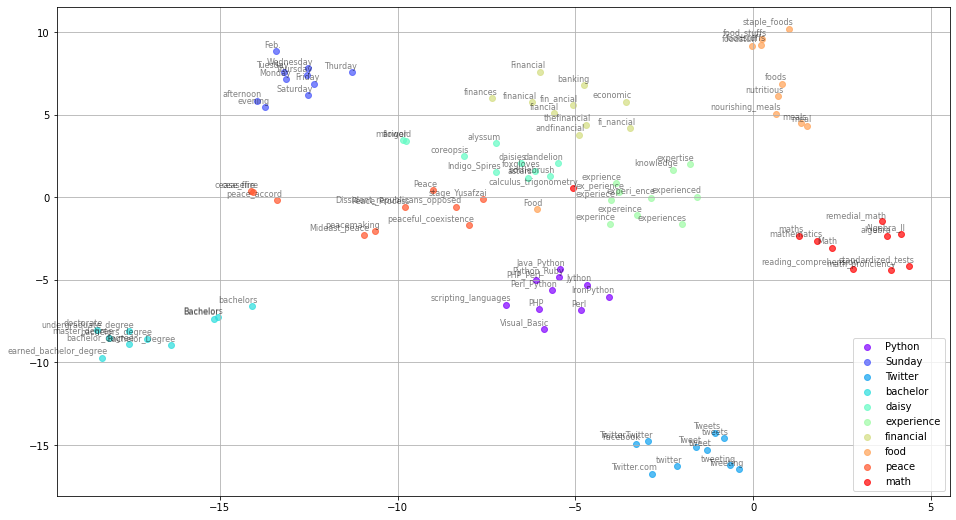

In [ ]:
tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters)

* Nhìn chung các từ có embedding gần nhau có sự phân cụm khá rõ ràng với một số nhóm như 'Python', 'Sunday', 'Twitter', 'math'.
* Trong trường hợp này, chỉ sử dụng 10 từ có embedding gần nhất. Có thể thấy tập hợp của các từ 'peace', 'daisy', 'experience', 'financial' khá gần nhau. Nhóm 'peace' các từ còn trải rộng, chưa phân cụm rõ ràng.
* Nếu tăng topn=10 lên, có thể nhìn thấy rõ sự phân cụm giữa các nhóm hơn.